In [1]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
import import_ipynb
from sklearn.model_selection import GroupShuffleSplit
import numpy_indexed as npi
from scipy import stats
import qgrid
from sklearn.metrics import make_scorer, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import seaborn as sns
from PIPELINE_CLASS import *

### Leer dataset

In [2]:
PATHDATA_MFFC_AVG = '../../../data/audios_MFCC_average_15000_tracks.csv'
df = pd.read_csv(PATHDATA_MFFC_AVG, header = None)
data = df.values #Convertimos en un  numpy array

In [3]:
X = data[:,0:-3]
Y = data[:,-2]
print('Tamaño dataSet', X.shape)
print('\n')
Y=  np.reshape(Y,(np.size(Y,0),1))
groups = data[:,-1]
tracks = data[:,-3:-2]

Tamaño dataSet (161602, 20)




In [4]:
FOLDS = 10
TRAIN_SIZE = 0.8


# MLP

## 1. Mejor modelo

Usamos X_train_original y Y_train__original para seleccionar la mejor combinación de parametros y posteriormente validar dichos res]ultados con el conjunto X_test__original y Y_test__original.

<b>Nota:</b> el conjunto X_train_original se divide en dos conjuntos train y dev a una proporción de 80 a 20.

In [5]:
clases =['yes','no','right','five','nine']
PIPELINE= PIPELINE_MULTIPLES_INST(X,Y,groups,tracks,FOLDS,TRAIN_SIZE,clases)

Número de clases: 5
Número de hablantes diferentes 1914
Número de audios diferentes 15000
### Info TRAIN
X (127740, 20)
Groups 1531
Tracks 11855
### Info TEST
X (33862, 20)
Groups 383
Tracks 3145


# Probamos multiples combinaciones

##  hidden_layer_sizes 36,36

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(36,36))
model_trained_36_36,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

Accuracy:  0.5160572337042926 


classification report :
               precision    recall  f1-score   support

         0.0       0.62      0.40      0.49       646
         1.0       0.57      0.50      0.53       623
         2.0       0.52      0.38      0.44       600
         3.0       0.36      0.76      0.49       626
         4.0       0.83      0.54      0.65       650

    accuracy                           0.52      3145
   macro avg       0.58      0.52      0.52      3145
weighted avg       0.58      0.52      0.52      3145



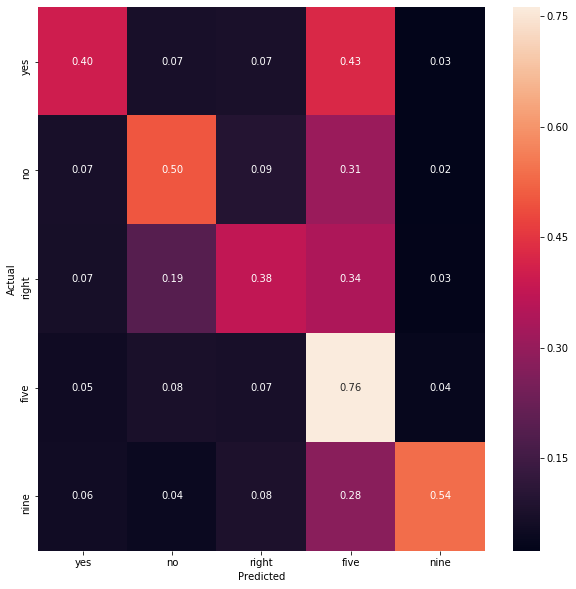

              precision    recall  f1-score   support

         0.0       0.62      0.40      0.49       646
         1.0       0.57      0.50      0.53       623
         2.0       0.52      0.38      0.44       600
         3.0       0.36      0.76      0.49       626
         4.0       0.83      0.54      0.65       650

    accuracy                           0.52      3145
   macro avg       0.58      0.52      0.52      3145
weighted avg       0.58      0.52      0.52      3145



In [7]:
report = PIPELINE.confusion_matrix_Metrics(model_trained_36_36)
print(report)

In [8]:
df_split_params = PIPELINE.learning_curve(model_trained,suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy',label_request=True)


NameError: name 'model_trained' is not defined

##  hidden_layer_sizes 36,36,36

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(36,36,36))
model_trained_36_36_36,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_36_36_36)
print(report)

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

##  hidden_layer_sizes 32,32

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32))
model_trained_32_32,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_32_32)
print(report)

##  hidden_layer_sizes 32,32,32

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32))
model_trained_32_32_32,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_32_32_32)
print(report)

##  hidden_layer_sizes 40,40

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(40,40))
model_trained_40_40,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_40_40)
print(report)

##  hidden_layer_sizes 40,40,40

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(40,40,40))
model_trained_40_40_40,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_40_40_40)
print(report)

### La mejor combinación de parametros

#Seleccionamos el modelo con el acurracy mas alto

model_trained_36_36  
model_trained_36_36_36  
model_trained_32_32   
model_trained_32_32_32 
model_trained_40_40  
model_trained_40_40_40  


In [14]:
best_model_trained = model_trained_36_36_36

## 2. Evalución mejor modelo con el conjunto de test

Accuracy:  0.4904386951631046 


classification report :
               precision    recall  f1-score   support

         0.0       0.41      0.69      0.51       170
         1.0       0.66      0.49      0.56       181
         2.0       0.57      0.33      0.42       185
         3.0       0.53      0.25      0.34       189
         4.0       0.45      0.73      0.56       164

    accuracy                           0.49       889
   macro avg       0.52      0.50      0.48       889
weighted avg       0.53      0.49      0.48       889



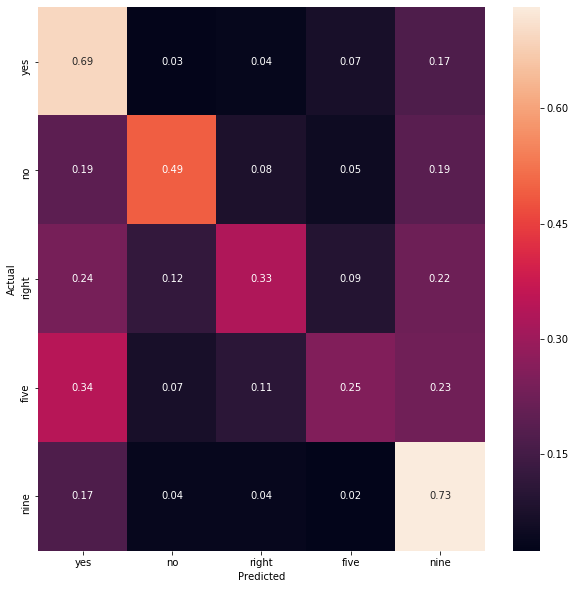

              precision    recall  f1-score   support

         0.0       0.41      0.69      0.51       170
         1.0       0.66      0.49      0.56       181
         2.0       0.57      0.33      0.42       185
         3.0       0.53      0.25      0.34       189
         4.0       0.45      0.73      0.56       164

    accuracy                           0.49       889
   macro avg       0.52      0.50      0.48       889
weighted avg       0.53      0.49      0.48       889



In [15]:
report = PIPELINE.confusion_matrix_Metrics(best_model_trained)
print(report)

## Learning Curve

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A 

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A 

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when 

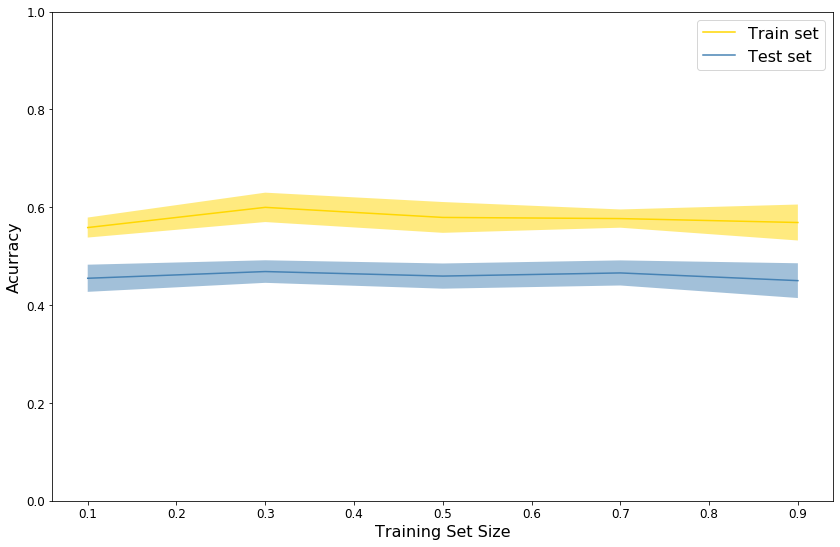

In [16]:
df_split_params = PIPELINE.learning_curve(best_model_trained,suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy',label_request=True)

In [17]:
df_split_params

,Train_Size,mean_train_Accuracy,mean_test_Accuracy,std_train_Accuracy,std_test_Accuracy
0,0.1,0.558521,0.454860,0.020459,0.027729
1,0.3,0.599805,0.468571,0.030040,0.023044
2,0.5,0.579202,0.459333,0.031496,0.025742
3,0.7,0.576858,0.465756,0.018658,0.025648
4,0.9,0.568825,0.450012,0.036762,0.035515
